# ASHITA K
# BEGINNER LEVEL TASK 2:
# 2) Stock Market Prediction And Forecasting Using Stacked LSTM

# Import Modules

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import matplotlib.dates as mandates
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

# Importing the dataset

In [18]:
stock = pd.read_csv("NSE-TATAGLOBAL.csv")
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [46]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [20]:
stock.shape

(2035, 8)

In [21]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [22]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [45]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [23]:
stock.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [53]:
stock.reset_index(inplace=True)
stock.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [59]:
stock.corr()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
index,1.000000,-0.693302,-0.692697,-0.696340,-0.694282,-0.694669,-0.255306,-0.403195
Open,-0.693302,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,-0.692697,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,-0.696340,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,-0.694282,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,-0.694669,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,-0.255306,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),-0.403195,0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


# Correlation Matrix

<AxesSubplot:>

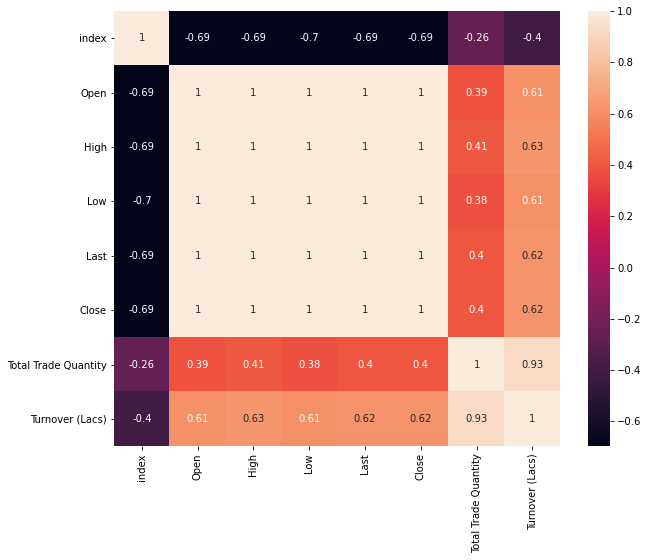

In [60]:
plt.figure(figsize=(10,8))
correlation=stock.corr()
sns.heatmap(correlation,annot=True)

# Data Visualization

<AxesSubplot:>

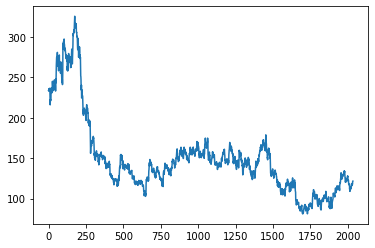

In [24]:
stock['Close'].plot()

In [62]:
stock["Close"].value_counts()

154.85    6
141.90    6
155.55    6
141.60    5
140.80    5
         ..
165.65    1
113.60    1
121.35    1
259.90    1
104.25    1
Name: Close, Length: 1313, dtype: int64

In [50]:
stock_close=stock['Close']

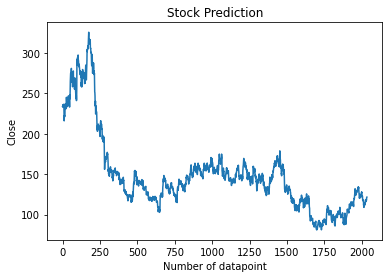

In [52]:
plt.plot(stock_close)
plt.xlabel('Number of datapoint')
plt.ylabel('Close')
plt.title("Stock Prediction")
plt.show()

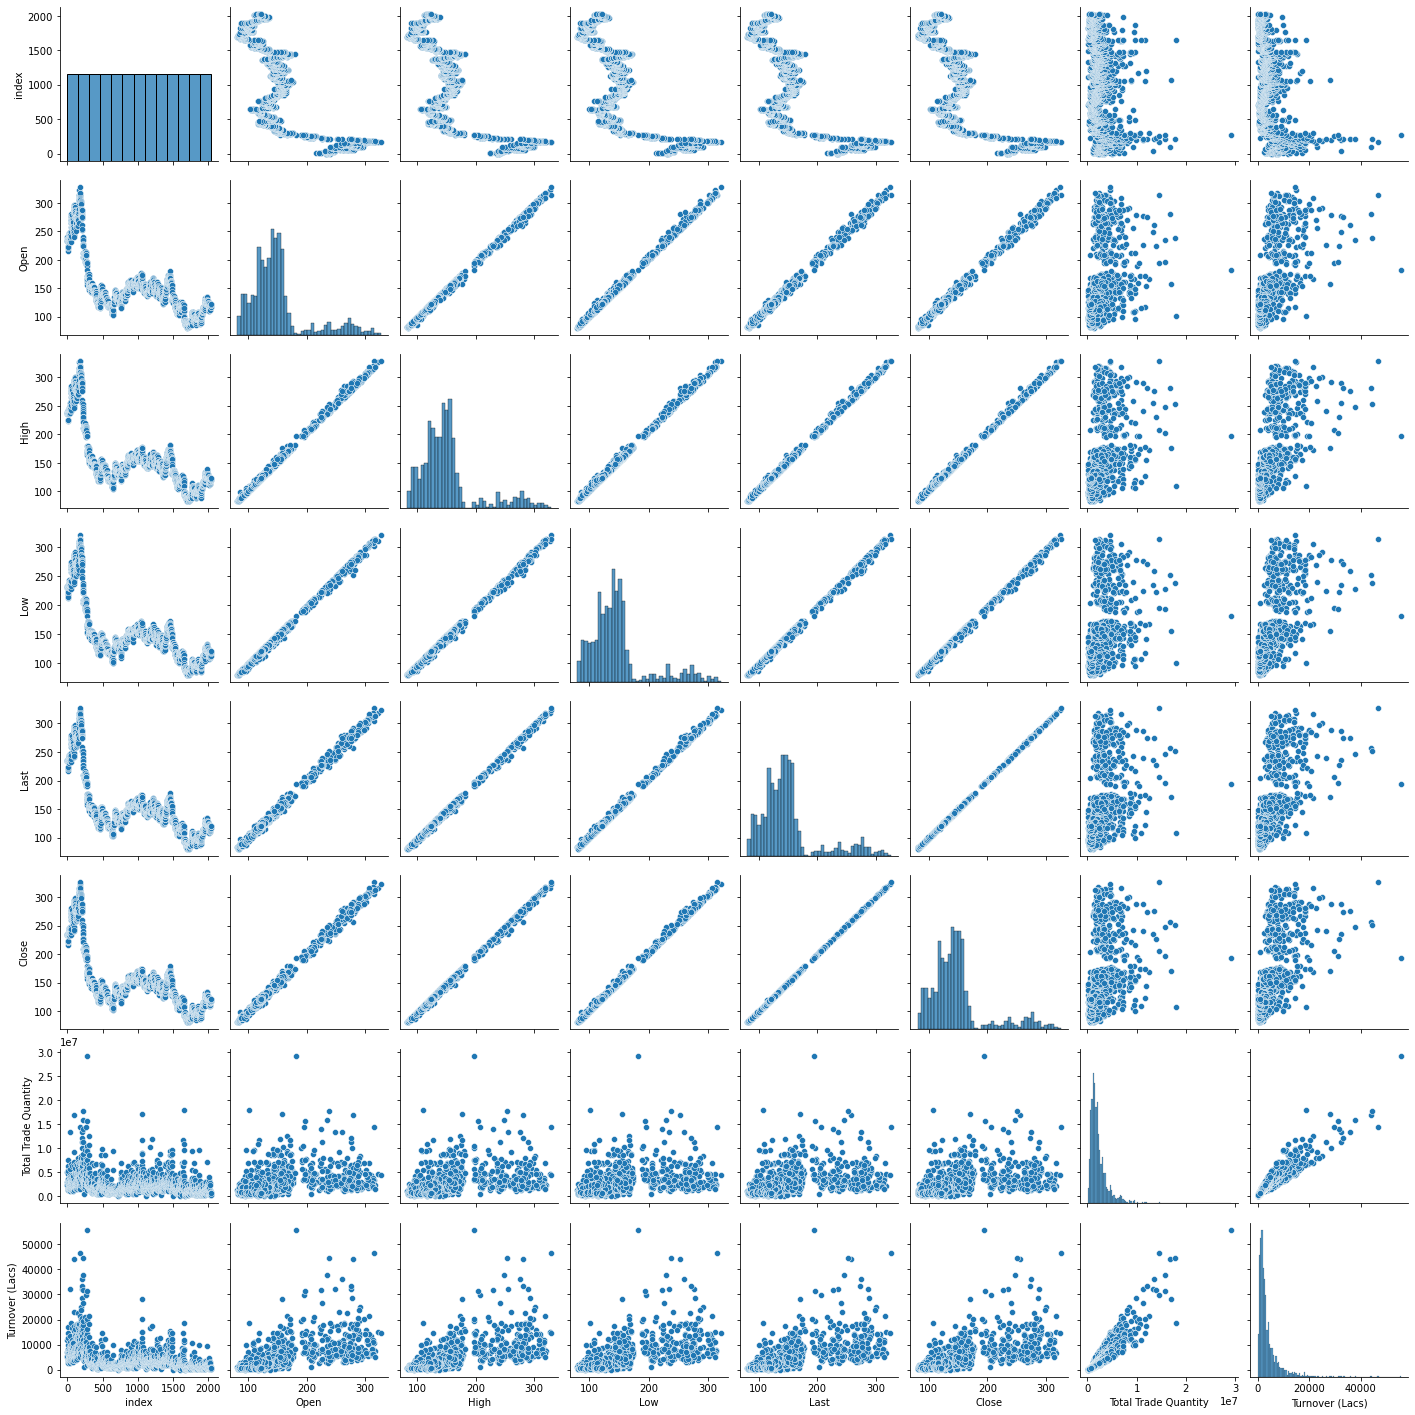

In [65]:
sns.pairplot(stock)

In [27]:
output_var = pd.DataFrame(stock['Close'])

In [28]:
features = ['Open', 'High', 'Low', 'Turnover (Lacs)']

In [34]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock.index)
feature_transform.head()

,Open,High,Low,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.127882
1,0.622263,0.626144,0.625285,0.212192
2,0.644363,0.639154,0.631078,0.093535
3,0.617194,0.625940,0.629009,0.098117
4,0.618208,0.635902,0.623836,0.142907


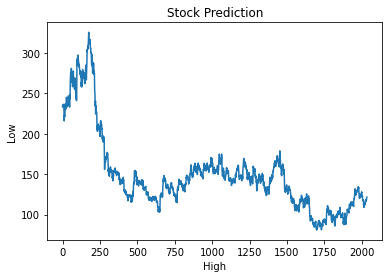

In [63]:
plt.plot(stock_close)
plt.xlabel('High')
plt.ylabel('Low')
plt.title("Stock Prediction")
plt.show()

In [35]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [36]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 3s 3ms/step - loss: 25860.9902
Epoch 2/100
232/232 [==============================] - 1s 3ms/step - loss: 25487.8633
Epoch 3/100
232/232 [==============================] - 1s 3ms/step - loss: 24018.1836
Epoch 4/100
232/232 [==============================] - 1s 2ms/step - loss: 21514.9375
Epoch 5/100
232/232 [==============================] - 1s 2ms/step - loss: 18301.9023
Epoch 6/100
232/232 [==============================] - 0s 2ms/step - loss: 14859.7139
Epoch 7/100
232/232 [==============================] - 1s 2ms/step - loss: 11526.7646
Epoch 8/100
232/232 [==============================] - 0s 2ms/step - loss: 8519.2432
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 5969.1841
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 3939.4150
Epoch 11/100
232/232 [==============================] - 0s 2ms/step - loss: 2431.6960
Epoch 12/100
232/232 [==============================] - 

In [43]:
y_pred= lstm.predict(X_test)
y_pred

array([[101.86554 ],
       [102.81886 ],
       [107.086716],
       [107.44096 ],
       [105.751076],
       [105.185974],
       [101.25383 ],
       [ 98.7077  ],
       [ 97.202225],
       [ 97.08087 ],
       [ 97.40761 ],
       [ 97.972916],
       [ 99.131   ],
       [ 98.41382 ],
       [ 97.701904],
       [ 98.18053 ],
       [ 98.412506],
       [ 98.017975],
       [ 97.93846 ],
       [ 99.469406],
       [ 99.12944 ],
       [102.37391 ],
       [ 99.49074 ],
       [ 95.9418  ],
       [ 95.63033 ],
       [ 90.67448 ],
       [ 89.34507 ],
       [ 90.591484],
       [ 90.874725],
       [ 90.22229 ],
       [ 87.91667 ],
       [ 88.561066],
       [ 92.44937 ],
       [ 95.98296 ],
       [ 96.250626],
       [ 95.1485  ],
       [ 98.64885 ],
       [ 97.35701 ],
       [ 94.96867 ],
       [ 94.77281 ],
       [ 93.03073 ],
       [ 89.45617 ],
       [ 87.23793 ],
       [ 90.67275 ],
       [ 94.54506 ],
       [ 96.51998 ],
       [ 95.9012  ],
       [ 96.1

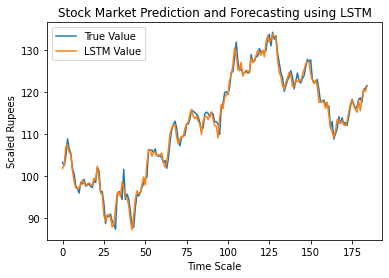

In [47]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Stock Market Prediction and Forecasting using LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()